# PROJET DEPRESSION :

<b>Groupe : Laurène David,  Allan Pendant,  Safa Hamdan, Claire Brulon,  Emma Rajaona</b> <br>
<b>M2 TIDE 2021-2022</b>

## Introduction 
L'objectif de notre projet est dans un premier temps de <b>prédire si un individu se déclare dépressif ou au contraire non-dépressif</b> à l'aide d'une <b>Regression Logistique</b>. 
<br>
Dans un second temps, nous allons chercher à tester<b> d'autres algorithmes de classification</b> sur nos données et de déterminer le "meilleur".

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = r"C:\Users\laure\Documents\M2_TIDE\PROJET\S1\Projet Python\depression.csv"
df_v1 = pd.read_csv(path)
df_v1.head(5)

,employed,mental_illness,education,computer_sep_phone,m_ill_hospitalized,days_hospitalized,disabled,reg_access_internet,live_w_parents,resume_gap,...,obsessive_thinking,mood_swings,panic_attacks,compulsive_behavior,tiredness,age,gender,household_income,region,device_type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [4]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

## Analyse préalable de nos données et nettoyage

### Description des variables

Nous allons commencer par décrire rapidement nos variables.

In [5]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employed              334 non-null    int64  
 1   mental_illness        334 non-null    int64  
 2   education             334 non-null    object 
 3   computer_sep_phone    334 non-null    int64  
 4   m_ill_hospitalized    334 non-null    int64  
 5   days_hospitalized     297 non-null    float64
 6   disabled              334 non-null    int64  
 7   reg_access_internet   334 non-null    int64  
 8   live_w_parents        334 non-null    int64  
 9   resume_gap            334 non-null    int64  
 10  months_gap_length     334 non-null    int64  
 11  annual_income_usd     334 non-null    int64  
 12  unemployed            334 non-null    int64  
 13  read                  334 non-null    int64  
 14  annual_social_income  334 non-null    int64  
 15  receive_food_stamps   3

Notre dataset est donc composé majoritairement de variables <b>binaires</b> avec quelques variables <b>quantitatives</b> et <b>qualitatives</b> à modalités multiples. <br>
Nous remarquons que plusieurs variables présentent des <b> variables manquantes </b> (le nombre de valeurs non-null étant inférieur au nombre de lignes du dataset). Nous verrons plus tard comment les traiter.
<br>

Nous allons maintenant chercher à visualiser les modalités de chaque variable ainsi que la fréquence des modalités.

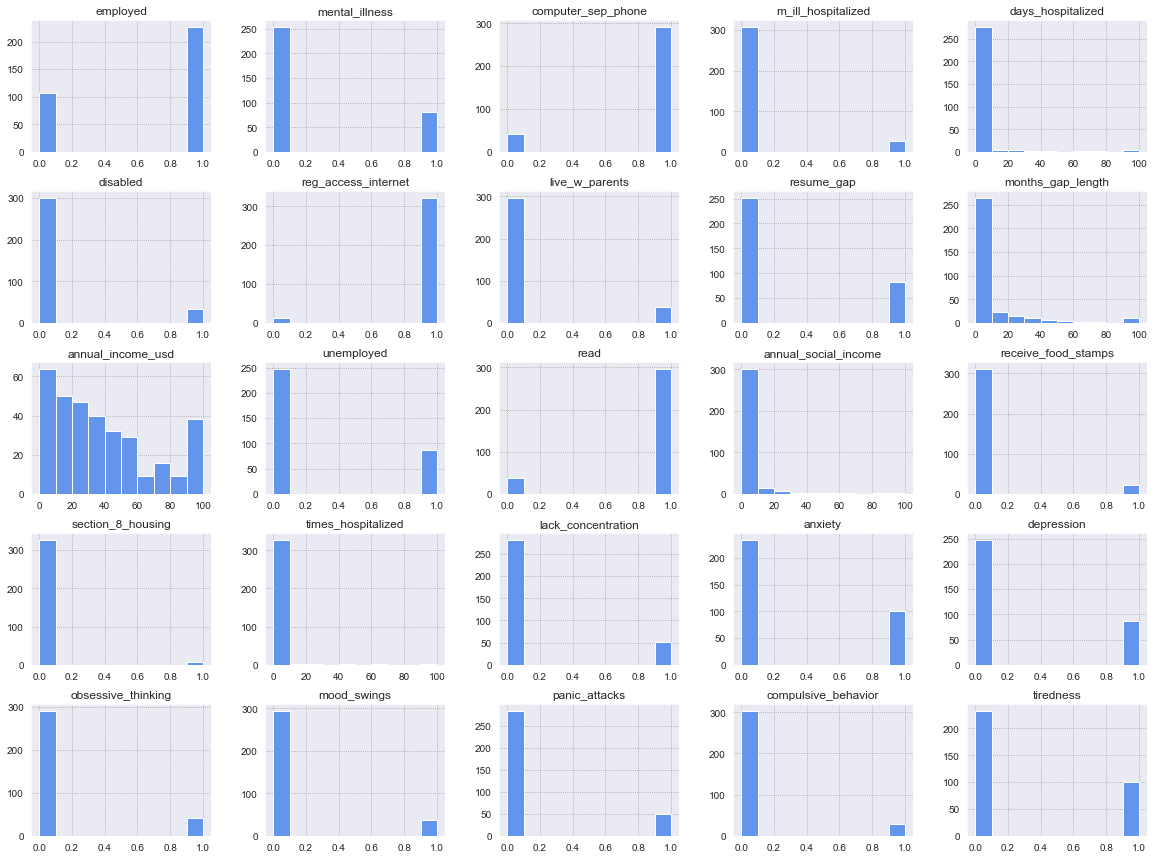

In [6]:
df_v1.hist(figsize=(20, 15), color = 'cornflowerblue');

Nous remarquons que notre target <b>"depression"</b> est plûtot <b>désequilibrée </b>. <br>  Ce désequilibre peut avoir un impact sur la <b>performance</b> de nos estimations ainsi que sur les <b>scores</b> à utiliser pour connaître la qualité de nos prédictions.

Nous commençons par tracer un histogramme de la <b>fréquence</b> pour les 2 modalités de "depression'.

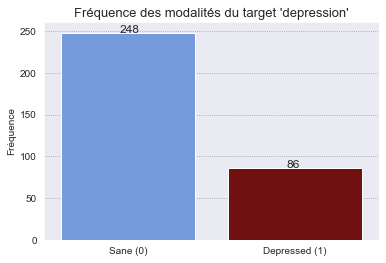

In [7]:
ax = sns.countplot(x = "depression", data = df_v1, 
                   palette = ['cornflowerblue', 'maroon'])
#                    sns.color_palette("Paired"));

plt.title("Fréquence des modalités du target 'depression'", fontsize = 13);
ax.set(xticklabels = ['Sane (0)', 'Depressed (1)'], ylabel = 'Fréquence', xlabel = '');

for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+0.1), fontsize = 12)

En terme de <b>pourcentage</b>, cela nous donne

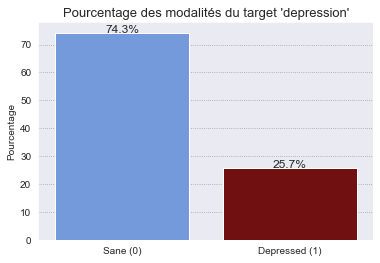

In [8]:
ax = sns.barplot(x = "depression", y = "depression", data = df_v1, 
                 estimator = lambda x : len(x) / len(df_v1)*100, 
                 palette = ['cornflowerblue', 'maroon']);

ax.set(xticklabels = ['Sane (0)', 'Depressed (1)'], ylabel = "Pourcentage", xlabel = '');
plt.title("Pourcentage des modalités du target 'depression'", fontsize = 13);

for p in ax.patches:
   ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+0.1), fontsize = 12)

Nous constatons donc que près de 3/4 de nos observations correspondent à des personnes "sane" (de class 0). <br>
L'intérêt de notre projet va donc être de <b>prédire tout aussi bien la class 1 (minoritaire) que la class 0 (majoritaire). </b>

### Etude de la corrélation des variables

Nous traçons ici la <b>matrice de corrélation</b> de notre dataframe sous forme de <b>heatmap</b>. <br>
Cela nous permet de détecter si certaines de nos variables sont fortement corrélés et si certaines doivent être éliminer (car leurs informations seraient redondantes).

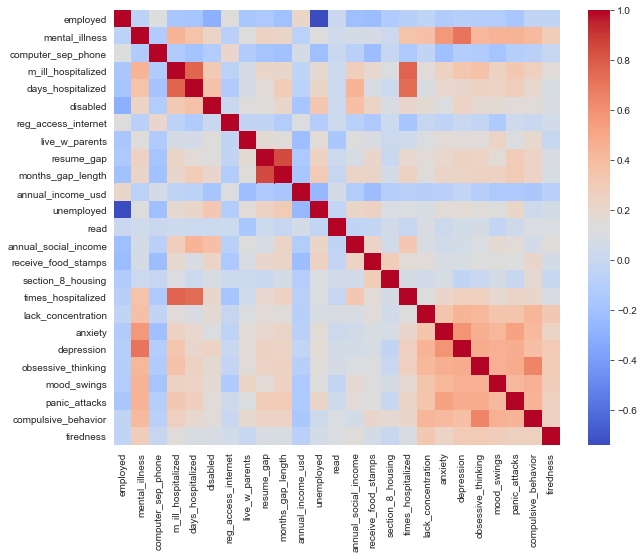

In [13]:
plt.figure(figsize=(10,8));
sns.heatmap(pd.DataFrame(df_v1.corr(method='spearman')), cmap=plt.get_cmap('coolwarm'));

Nous remarquons qu'il existe une forte relation de corrélation entre times_hospitalized, m_ill_hospitalized et days_hospitalized. <br>
Il en est de même pour months_gap_length et resume_gap.


### Valeurs aberrantes

En examinant de plus près days_hospitalized, nous observants des <b>résultats aberrants</b> pour times_hospitalized et days_hospitalized. <br>
Certaines personnes disent n'être jamais à l'hopital (times_hospitalized = 0) mais déclarent avoir passer au moins un jour à l'hopital (days_hospitalized > 0).

In [14]:
days_times_hosp = pd.crosstab(df_v1["days_hospitalized"], df_v1["times_hospitalized"])

days_times_hosp.style.set_properties(**{'background-color': 'lightsteelblue'}, subset=[0])

times_hospitalized,0,1,2,3,4,5,6,7,19,20,43,69,100
days_hospitalized,,,,,,,,,,,,,
0.0,245,10,0,0,0,0,0,0,0,0,0,0,0
1.0,8,2,1,2,0,0,0,0,0,0,0,0,0
2.0,1,0,0,0,0,1,0,0,0,1,0,0,0
3.0,0,1,0,0,0,0,0,0,0,0,0,0,0
5.0,0,1,0,0,0,1,0,0,0,0,0,0,0
6.0,1,0,0,0,0,0,0,0,0,0,0,0,0
8.0,0,2,0,0,0,0,0,0,0,0,0,0,0
10.0,0,1,0,0,0,0,0,0,0,0,0,0,0
13.0,0,1,0,0,0,0,0,0,0,0,0,0,0


Ces lignes dans le dataframe correspondent à :

In [15]:
df_v1.loc[(df_v1["times_hospitalized"] == 0)&(df_v1["days_hospitalized"] != 0.0)&(df_v1["days_hospitalized"].isnull() == False), 
          ["times_hospitalized", "days_hospitalized"]]

,times_hospitalized,days_hospitalized
40,0,78.0
67,0,1.0
70,0,1.0
88,0,1.0
113,0,1.0
129,0,1.0
139,0,1.0
184,0,6.0
188,0,1.0
254,0,1.0


Nous avons aussi remarqué des valeurs aberrantes pour <b>resume_gap et months_gap_length </b>.

In [16]:
pd.crosstab(df_v1["resume_gap"],df_v1["months_gap_length"])

months_gap_length,0,1,2,3,4,5,6,7,8,9,...,45,47,48,52,53,59,66,73,97,100
resume_gap,,,,,,,,,,,,,,,,,,,,,
0,218,18,3,3,0,0,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,2,3,2,1,3,3,2,1,2,...,1,1,2,2,1,1,1,1,1,10


Il existe des observations où la personne indique ne pas avoir de "resume gap" tout en déclarant avoir au moins un mois de "gap" dans son resume.

In [17]:
df_v1.loc[(df_v1["resume_gap"] == 0)&(df_v1["months_gap_length"] > 0.0), 
          ["resume_gap", "months_gap_length"]].head(10)

,resume_gap,months_gap_length
1,0,1
19,0,21
21,0,32
32,0,1
40,0,22
41,0,43
45,0,6
49,0,6
57,0,1
67,0,1


In [18]:
perct_months = 100*(df_v1.loc[(df_v1["resume_gap"] == 0)&(df_v1["months_gap_length"] > 0.0), 
          ["resume_gap", "months_gap_length"]].shape[0])/df_v1.shape[0]

print(f"Le nombre de valeurs incohérantes de months_gap_length correspond à près {perct_months:.0f}" + '% de ses observations.' )

Le nombre de valeurs incohérantes de months_gap_length correspond à près 10% de ses observations.


### Traitement des valeurs manquantes 

Nous allons chercher à déterminer les variables ayant des valeurs manquantes et ainsi que leur nombre de valeurs manquantes.

In [19]:
print("Nombre de valeurs manquantes par variables :")
pd.DataFrame({'valeurs manquantes':df_v1.apply(lambda x : x.isna().sum(), axis = 0).values}, index = df_v1.columns).style.applymap(lambda x: 'background-color : lightsteelblue' if x > 0 else "")

Nombre de valeurs manquantes par variables :


,valeurs manquantes
employed,0
mental_illness,0
education,0
computer_sep_phone,0
m_ill_hospitalized,0
days_hospitalized,37
disabled,0
reg_access_internet,0
live_w_parents,0
resume_gap,0


La plupart des variables possèdent peu voir pas de valeurs manquantes. <br>
Nous remarquons cependant que days_hospitalized présente beaucoup de <b> valeurs manquantes </b> (37). 
<br>

Nous allons donc supprimer <b> days_hospitalized </b>  puisqu'elle presente beaucoup de valeurs manquantes, des données incohérantes et une forte corrélation avec d'autres variables du dataframe. <br>
Nous allons aussi supprimer <b>months_gap_length</b> de notre modèle puisque 10% de ces données paraissent incohérantes et qu'elle est fortement corrélée à resume_gap.

In [20]:
df_v2 = df_v1.drop(columns = ["days_hospitalized","months_gap_length"])

Nous cherchons maintenant les variables restantes ayant une à plusieurs valeurs manquantes.

In [21]:
pd__ = pd.DataFrame({'isna':df_v2.isnull().any()})
columns_isna = pd__.loc[pd__['isna'] == True].index.to_list()
columns_isna

['lack_concentration',
 'obsessive_thinking',
 'mood_swings',
 'panic_attacks',
 'compulsive_behavior',
 'tiredness',
 'region']

Pour chaque variable sélectionné, nous voulons déterminer les lignes qui correspondent à ces valeurs manquantes. <br>
Cela nous empêchera de supprimer trop de lignes si les valeurs manquantes sont réparties sur un grand nombre de lignes.

In [22]:
def index_isna (column):
    index_ = df_v2.loc[df_v2[column].isna() == True].index
    tab = []
    for i in range(0, len(index_)):
        tab.append(index_[i])
    return tab

pd.DataFrame({"nbr_na":df_v2.isnull().sum()[columns_isna], 'index':list(map(lambda x : index_isna(x),columns_isna))})

,nbr_na,index
lack_concentration,1,[333]
obsessive_thinking,1,[333]
mood_swings,1,[333]
panic_attacks,1,[333]
compulsive_behavior,1,[333]
tiredness,1,[333]
region,2,"[77, 203]"


Les valeurs manquantes sont donc réparties sur les lignes 77, 203 et 333.

In [23]:
df_v2[columns_isna + ["depression"]].iloc[[77,203,333]].fillna("NaN").style.applymap(lambda x: 'font-weight: bold' if x == "NaN" else "")

,lack_concentration,obsessive_thinking,mood_swings,panic_attacks,compulsive_behavior,tiredness,region,depression
77,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0
203,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0
333,NaN,NaN,NaN,NaN,NaN,NaN,Pacific,1


In [24]:
print(f"Ces lignes correspondent à {100*df_v2.iloc[[77,203,333]].shape[0]/df_v2.shape[0]:.2f}% des lignes du dataframe.")

Ces lignes correspondent à 0.90% des lignes du dataframe.


Puisque ces lignes ne correspondent qu'à une infime partie du dataframe, nous avons décidé de les supprimer du modèle.

In [25]:
df_v3 = df_v2.drop([77,203,333], axis = 0)

Nous verifions maintenant qu'il ne reste plus de valeurs manquantes dans notre dataframe.

In [26]:
df_v3.isna().any().all() 

False

## Preprocessing :

Avant de pouvoir entrainer un algorithme de classification sur nos données, nous devons les transformer.

### OneHotencoder

Nous allons d'abord transformer les variables catégorielles à multiples modalités en variables binaires. <br>
On les selectionne grâce à la fonction "make_column_selector" de sklearn.

In [27]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(df_v3)
categorical_columns

['education', 'age', 'gender', 'household_income', 'region', 'device_type']

On applique ensuite un "OneHotencoder" sur les colonnes selectionnées. <br>
Pour chaque modalité, OneHotEncoder construit une nouvelle colonne.

In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [29]:
OneHot = OneHotEncoder(sparse=False) 

new_ = OneHot.fit_transform(df_v3[categorical_columns]) #transformation des colonnes catégorielles
feature_names = OneHot.get_feature_names(input_features=categorical_columns) #liste des colonnes crées par OneHotEncoder

feature_names

array(['education_Completed Masters', 'education_Completed Phd',
       'education_Completed Undergraduate',
       'education_High School or GED', 'education_Some Phd',
       'education_Some Undergraduate', 'education_Some highschool',
       'education_Some\xa0Masters', 'age_18-29', 'age_30-44', 'age_45-60',
       'age_> 60', 'gender_Female', 'gender_Male',
       'household_income_$0-$9,999', 'household_income_$10,000-$24,999',
       'household_income_$100,000-$124,999',
       'household_income_$125,000-$149,999',
       'household_income_$150,000-$174,999',
       'household_income_$175,000-$199,999', 'household_income_$200,000+',
       'household_income_$25,000-$49,999',
       'household_income_$50,000-$74,999',
       'household_income_$75,000-$99,999',
       'household_income_Prefer not to answer',
       'region_East North Central', 'region_East South Central',
       'region_Middle Atlantic', 'region_Mountain', 'region_New England',
       'region_Pacific', 'region_Sout

In [30]:
onehot_df = pd.DataFrame(new_, columns = [feature_names])
onehot_df.head(10)

,education_Completed Masters,education_Completed Phd,education_Completed Undergraduate,education_High School or GED,education_Some Phd,education_Some Undergraduate,education_Some highschool,education_Some Masters,age_18-29,age_30-44,...,region_New England,region_Pacific,region_South Atlantic,region_West North Central,region_West South Central,device_type_Android Phone / Tablet,device_type_MacOS Desktop / Laptop,device_type_Other,device_type_Windows Desktop / Laptop,device_type_iOS Phone / Tablet
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Nous construisons ensuite un nouveau data frame avec les colonnes créées par le OneHotEncoder et en supprimant les colonnes initiales.

In [31]:
df_v4 = df_v3.drop(categorical_columns,axis = 1) #suppression des colonnes transformées
df_v4[feature_names] = onehot_df.values #ajout des nouvelles colonnes binaires

### Standard Scaler

Nous allons maintenant standardiser les variables quantitatives de notre modèle grâce à la fonction <b>"StandardScaler"</b> de sklearn. 
<br>


Cette étape est importante pour les algorithmes qui utilisent une "distance" (comme K-Nearest-Neighbour ou SVM) et dont les résultats peuvent être faussé si les variables quantitatives disposent d'échelles différentes.

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler().fit(df_v4[["annual_income_usd","annual_social_income"]]) #entrainer la fonction sur les variables quantitatives
scaler_transf = scaler.transform(df_v4[["annual_income_usd","annual_social_income"]]) #appliquer le StandarsScaler sur nos variables

scaler_transf

array([[-0.08394203, -0.26793181],
       [-0.50739168, -0.26793181],
       [ 2.03330622, -0.26793181],
       [-1.22399878, -0.26793181],
       [-0.18166118,  2.12681428],
       [-1.22399878, -0.26793181],
       [-1.19142573, -0.26793181],
       [-0.86569523, -0.26793181],
       [ 1.15383387, -0.26793181],
       [-0.83312218, -0.26793181],
       [-1.22399878, -0.26793181],
       [-1.22399878, -0.26793181],
       [ 0.40465372, -0.26793181],
       [-0.40967253, -0.26793181],
       [ 0.69781117, -0.26793181],
       [ 2.03330622, -0.26793181],
       [ 0.33950762,  3.48383707],
       [-0.70282998, -0.26793181],
       [ 0.56751897, -0.26793181],
       [-1.19142573, -0.18810694],
       [ 2.03330622, -0.26793181],
       [-0.44224558,  5.0005096 ],
       [ 0.17664237, -0.26793181],
       [ 0.01377712, -0.26793181],
       [ 1.21897997, -0.18810694],
       [-1.06113353, -0.26793181],
       [ 0.37208067, -0.26793181],
       [ 0.24178847, -0.26793181],
       [-1.22399878,

In [34]:
df_v4[["annual_income_usd","annual_social_income"]] = scaler_transf #remplacer les données initiales avec les données standardisées
df_v4[["annual_income_usd","annual_social_income"]]

,annual_income_usd,annual_social_income
0,-0.083942,-0.267932
1,-0.507392,-0.267932
2,2.033306,-0.267932
3,-1.223999,-0.267932
4,-0.181661,2.126814
...,...,...
328,0.078923,-0.267932
329,-1.223999,-0.267932
330,0.795530,-0.267932
331,-1.223999,-0.188107


### Creation des variables du modèle

Maintenant que nous disposons de données exploitables, nous allons créer nos variables "data" et "train".<br>
<b>"data"</b> correspond à l'ensemble des variables explicatives du modèle <br>
<b>"train"</b> correspond à la variable à expliquer

In [35]:
data = df_v4.drop(columns = 'depression')
target = df_v4['depression'].values

Nous allons aussi segmenter ces deux variables en <b>données d'apprentissage</b> et <b>données test</b>. <br>
Cela nous permettra d'entrainer notre modèle sur les données "train" et de tester la fiabilité/performance de nos prédictions grâce aux données "test".


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, stratify = target)

Puisque notre variable à prédire "depression" est désequilibrée, nous avons choisi d'utiliser une méthode de <b>stratifiedsplit</b>. <br>
Cette méthode permet de construire des train/test split qui prennent en la fréquence des modalités de notre target "depression".

## Régression Logistique

Nous allons commencer par entrainer un modèle de <b>regression logistique</b> sur nos données pour prédire notre target binaire.

### Modèle et prédiction

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_ = LogisticRegression(class_weight = 'balanced', solver='liblinear')
log_fit = log_.fit(data_train,target_train) #entraine l'algorithme sur nos données "train"

Nous cherchons maintenant à prédire la variable "depression" sur notre jeu de données "test".

In [40]:
log_predict = log_fit.predict(data_test)
log_predict

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

La regression logistique fournit <b>les probabilités (à posterori)</b> d'appartenir à chaque class de "depression" pour l'ensemble de données.

In [41]:
proba_log = np.round(log_fit.predict_proba(data_test),2)
proba_log[0:15]

array([[0.98, 0.02],
       [0.01, 0.99],
       [0.95, 0.05],
       [0.13, 0.87],
       [0.96, 0.04],
       [0.05, 0.95],
       [0.92, 0.08],
       [0.14, 0.86],
       [0.86, 0.14],
       [0.98, 0.02],
       [0.78, 0.22],
       [0.  , 1.  ],
       [0.65, 0.35],
       [0.  , 1.  ],
       [0.97, 0.03]])

Elle fournit aussi des <b>coefficients</b> associés à chaque variable à expliquer et un <b>intercept</b>.

In [42]:
print(f"coefficients :{np.round(log_fit.coef_[0],2)}")
print(f"intercept :{np.round(log_fit.intercept_[0],2)}")

coefficients :[-0.    2.5  -0.55  0.36  0.58 -0.13  0.06  0.32  0.56  0.27  0.09  0.01
  0.54 -0.94  0.03  1.15  1.    1.45  1.    0.25 -0.6   0.49 -0.17  0.14
  0.08 -0.33 -0.1   0.69 -0.42 -0.94  0.13  0.02 -0.64 -0.57 -0.32 -0.74
  0.14 -0.53 -0.12 -0.2  -0.52  0.    0.31 -0.1   0.21  0.31 -0.55  0.31
  0.53 -0.22  0.16 -0.36 -0.12 -0.36 -0.42 -0.58 -0.94 -0.31 -0.05  0.08
  0.17]
intercept :-1.06


Ces coefficients peuvent être interprété comme des <b>indicateurs de la significativité</b> de chaque variable à notre modèle.

### Significativité des variables 

Dans cette partie, nous allons étudier <b>la significativité des variables</b> de notre modèle. <br>
Nous allons commencer par représenter les variables qui sont relativement significatives, en fixant comme valeur min 0,3 pour une variable significtaive. <br>

In [43]:
coef_log = pd.DataFrame({'variables':data_train.columns, 
                          'coef':log_fit.coef_[0]}).sort_values('coef', ascending = False)
coef_log.loc[coef_log['coef'] > 0.3]

,variables,coef
1,mental_illness,2.502263
17,obsessive_thinking,1.445482
15,lack_concentration,1.153181
16,anxiety,1.000856
18,mood_swings,0.996542
27,education_Some Undergraduate,0.689139
4,disabled,0.580723
8,annual_income_usd,0.556778
12,receive_food_stamps,0.541316
48,region_East South Central,0.532005


La variable <b>mental_illness</b> semble être la plus significative pour expliquer les données de <b>depression</b>. <br>
D'autres variables comme <b>obsessive_thinking, disabled et mood_swings</b> semblent aussi jouer un rôle important.

Nous allons tracer un barplot pour représenter la significativité générale des variables 

In [44]:
plt.figure(figsize=(10,13));
ax = sns.barplot(x = "coef", y = "index", data = coef_log, color='r');
#                  palette = sns.color_palette("Paired"));
plt.title("Significativité des variables de la regression", fontsize = 13);
ax.set(ylabel = '');

ValueError: Could not interpret input 'index'

<Figure size 720x936 with 0 Axes>

Nous savons que lorsqu'un coefficient est estimé être<b> proche de zero</b>, il y a de grande chance que le vraie coefficient soit nul. <br>
Nous avons donc décidé de déclarer les variables ayant un coefficient estimé trop faible comme <b>non-significatives</b>. 

In [ ]:
percent_zero = [100*coef_log.loc[coef_log['coef'] < -0.3].shape[0]/coef_log.shape[0],
                100*(coef_log.loc[coef_log['coef'] > 0.3].shape[0])/coef_log.shape[0],
               100*(coef_log.loc[(coef_log['coef'] > -0.3) & (coef_log['coef'] < 0.3)]).shape[0]/coef_log.shape[0]]

percent_descrip = ["Negatif","Positif","Non-significatif"]

plt.figure(figsize=(5,5))
plt.title("Proportion de significativité des variables", fontweight = 'bold')
colors = ['red','darkred','darksalmon']
plt.pie(percent_zero, labels = percent_descrip, colors = colors, autopct='%.1f%%');
plt.show()

Nous constatons qu'une partie importante de nos variables est considérée comme non-significatives. <br>
Il y a autant de variables significativement positives que de variables négativement significatives.

### Performance de l'estimation

Nous traçons une <b> matrice de confusion </b> pour étudier la performance du classifieur.
Cette matrice permet de representer les "bonnes" prédictions ainsi que les erreurs de classification du modèle. 

In [45]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [46]:
log_conf = confusion_matrix(target_test, log_predict)
log_conf

array([[69,  5],
       [10, 16]], dtype=int64)

Le erreurs de classification pour la class 0 correspond à 6.8% des prédictions
Le erreurs de classfication pour la class 1 correspond à 38.5% des prédictions


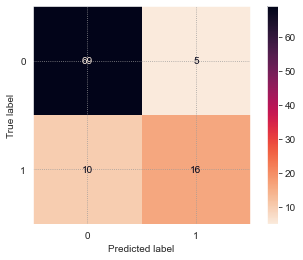

In [47]:
plot_confusion_matrix(log_fit, data_test, target_test, cmap=sns.color_palette("rocket_r", as_cmap=True));

print(f"Le erreurs de classification pour la class 0 correspond à {100*log_conf[0][1]/(log_conf[0][0]+log_conf[0][1]):.1f}% des prédictions")
print(f"Le erreurs de classfication pour la class 1 correspond à {100*log_conf[1][0]/(log_conf[1][1]+log_conf[1][0]):.1f}% des prédictions")

Notre regression logistique se trompe <b>beaucoup plus souvent</b> pour prédire la class 1 que pour prédire la class 0. <br>
Cela n'est pas surprenant car le dataframe est désequilibré et ne comporte que peu d'observations ayant la class 1.

Nous allons maintenant chercher à calculer un <b>score de la performance du classifieur</b>, ce qui nous permettra de le comparer plus tard à d'autres classifieurs.

<b> Score du modèle </b>

Nous avons choisi de calculer le <b> recall </b> (la proportion de points réellement "positifs" qui ont été bien classés) et la <b> précision </b> (la proportion de points classés comme "positifs" (la class 1) qui était réellement positifs), puisque notre target "depression" est <u>désequilibrée</u>. <br>
Nous utiliserons aussi le <b> f1-score </b>qui est une moyenne entre la précision et le recall du modèle.

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, PrecisionRecallDisplay

In [49]:
precision_log = precision_score(target_test, log_predict)
recall_log = recall_score(target_test, log_predict)
f1_log = f1_score(target_test,log_predict)

Performance de la Regression Logistique
Precision score: 0.762
Recall score: 0.615
f1-score: 0.681


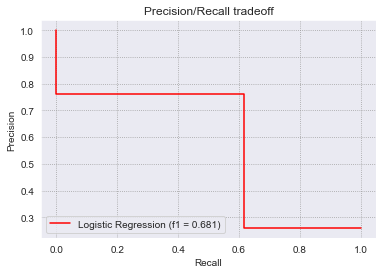

In [50]:
precision, recall, _ = precision_recall_curve(target_test, log_predict);
disp_log = PrecisionRecallDisplay(precision=precision, recall=recall);

disp_log.plot(color = "r", ax = plt.gca(), label = f'Logistic Regression (f1 = {f1_log:.3f})');
plt.title ("Precision/Recall tradeoff");

print("Performance de la Regression Logistique")
print(f"Precision score: {precision_log:.3f}")
print(f"Recall score: {recall_log:.3f}")
print(f"f1-score: {f1_log:.3f}")

Le f1-score de la régression logistique est correct. <br>
Nous allons tout de même chercher à améliorer cette performance en cherchant optimiser les paramètres choisis dans sklearn.

### Sélection du meilleur modèle

Les paramètres utilisées dans la fonction de sklearn pour faire notre regression ont été fixé de façon arbitraire. <br>
Pour construire le meilleur modèle possible, nous allons opérer à un <b>GridSeachCV</b> qui utilise une CV pour obtenir les meilleures paramètres.

Nous fixons le paramètre class_weight à l'option "balanced" puisque notre target est désequilibré.

<b> Grid Search Regression Logistique </b>

In [51]:
from sklearn.model_selection import GridSearchCV

In [329]:
dict_log = {'C': np.arange(1,8,0.5), 'penalty':["l1","l2"]} #creation du dictionnaire des paramètres à tester
scoring = ["precision", "recall","f1"] #liste des scores à optimiser

In [285]:
grid_log = GridSearchCV(LogisticRegression(class_weight = 'balanced', solver='liblinear'),
                        dict_log,
                        cv=5, scoring = scoring, refit="f1").fit(data_train,target_train)

Comparons maintenant les résultats de notre Régression Logistique et du Grid Search.

In [340]:
print(f"Parameters of Grid Search: {grid_log.best_params_:}")

pd.DataFrame({'Precision': [precision_log, precision_score(target_test, grid_log.predict(data_test))], 
              'Recall': [recall_log, recall_score(target_test, grid_log.predict(data_test))], 
              'f1-score': [f1_log, grid_log.best_score_]},
               index = ['Logistic Regression', 'Grid Search LR']).T

Parameters of Grid Search: {'C': 1.5, 'penalty': 'l1'}


,Logistic Regression,Grid Search LR
Precision,0.678571,0.826087
Recall,0.730769,0.730769
f1-score,0.703704,0.713675


Le f1_score du Grid Search est très légèrement meilleur que celui de notre modèle initial. <br>
Cependant la précision prend 0.2 point supplémentaire. ous allons tracer le <b>Precision/Recall tradeoff</b> des deux modèles pour les comparer graphiquement.

Nous allons tracer le <b>Precision/Recall tradeoff</b> des deux modèles pour les comparer graphiquement.

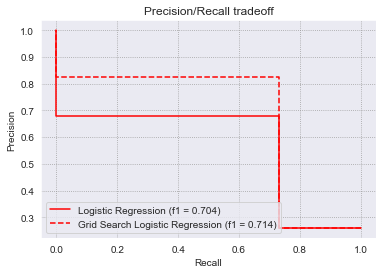

In [677]:
precision, recall, _ = precision_recall_curve(target_test, log_predict);
precision_1, recall_1, _1 = precision_recall_curve(target_test, grid_log.predict(data_test));

disp_log = PrecisionRecallDisplay(precision=precision, recall=recall);
disp1_log = PrecisionRecallDisplay(precision=precision_1, recall=recall_1);

disp_log.plot(color = "r", ax = plt.gca(), label = f'Logistic Regression (f1 = {f1_log:.3f})');
disp1_log.plot(color= "r", ax = plt.gca(), linestyle = 'dashed', label = f'Grid Search Logistic Regression (f1 = {grid_log.best_score_:.3f})')
plt.title ("Precision/Recall tradeoff");


Le gain de notre Grid Search en terme de <b>précision</b> est bien représenté dans le graphique. <br>
 
Nous allons continuer à entrainer nos données sur d'autres algorithmes de classification pour voir si nous pouvons maximiser le f1 score de notre classification.

## Arbre de décision binaire (CART)

Nous allons construire un classifieur par arbre de décision grâce à la fonction "DecisionTreeClassifier"

### Modèle et prédiction

In [52]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Nous commençons par ne pas fixer de paramètres qui joue sur la taille de l'arbre (max_depth, min_samples_split ou min_samples_leaf) et construire un arbre "exhaustif". <br>
Nous verrons par la suite si cet arbre est confronté à un problème <b>d'overfitting</b> (qui s'adapte trop aux données et possède donc une forte variabilité).

<b> Création de notre arbre de décision </b>

In [53]:
tree_ = DecisionTreeClassifier(criterion = 'gini', splitter = 'best')
tree_fit = tree_.fit(data_train, target_train) #creation de notre classifieur CART
tree_predict = tree_fit.predict(data_test) #prédiction de notre target "depression"

<b> Prédiction de l'arbre de décision </b>

In [54]:
tree_predict

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Nous traçons maintenant l'arbre CART que nous avons entraîné sur nos données.

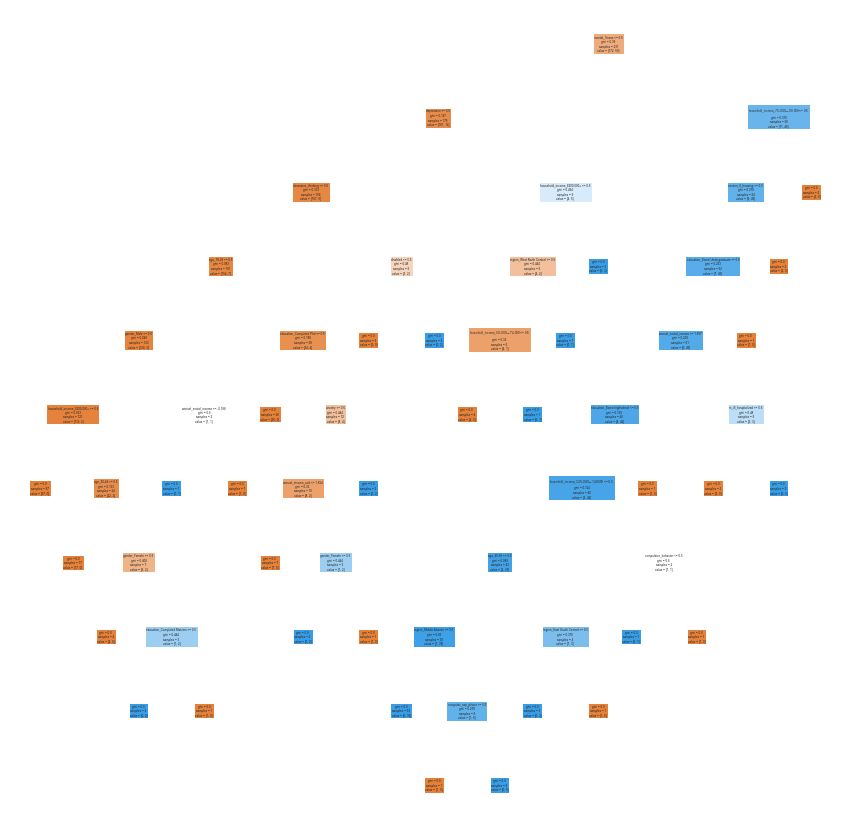

In [415]:
plot_colors = sns.color_palette("Paired")
plt.figure(figsize = (15,15))
plot_tree(tree_fit, filled = True, feature_names = df_v4.columns)
plt.show()

Nous remarquons que la taille de l'arbre est assez conséquent (la profondeur de l'arbre est important). <br>
Il se peut que notre arbre fait face à un problème de <b>surapprentissage</b> et s'adapte trop aux données. <br>

Avant de régler le problème de surapprentissage, nous allons d'abord étudier l'importance de chaque variable pour l'arbre.

### Feature importance

In [55]:
tree_fit.feature_importances_

array([0.0151754 , 0.52411613, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03382364, 0.        ,
       0.        , 0.02111139, 0.00236069, 0.03072838, 0.        ,
       0.03126671, 0.01748373, 0.08140894, 0.        , 0.        ,
       0.        , 0.01214032, 0.01360234, 0.        , 0.        ,
       0.        , 0.        , 0.01951123, 0.01738133, 0.01807658,
       0.02750542, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01138155, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0210121 , 0.01827681, 0.02878335, 0.01767419, 0.        ,
       0.        , 0.        , 0.        , 0.01896926, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01821048,
       0.        ])

Nous remarquons que beaucoup de ces coefficients sont nuls. 

In [56]:
coef_tree = pd.DataFrame({'variables':data_train.columns, 
                          'coef':tree_fit.feature_importances_}).sort_values('coef', ascending = False)

coef_tree.loc[coef_tree['coef'] == 0]

,variables,coef
18,mood_swings,0.0
51,region_New England,0.0
44,"household_income_$50,000-$74,999",0.0
7,resume_gap,0.0
6,live_w_parents,0.0
5,reg_access_internet,0.0
4,disabled,0.0
49,region_Middle Atlantic,0.0
50,region_Mountain,0.0
3,m_ill_hospitalized,0.0


Si nous nous concentrons que sur les variables ayant un <b>coefficient positifs, nous obtenons.

In [58]:
coef_tree.loc[coef_tree['coef'] > 0].style.applymap(lambda x:  'background-color : bisque' if x == max(coef_tree['coef']) else "")

,variables,coef
1,mental_illness,0.524116
17,obsessive_thinking,0.081409
8,annual_income_usd,0.033824
15,lack_concentration,0.031267
13,section_8_housing,0.030728
47,region_East North Central,0.028783
30,age_18-29,0.027505
11,annual_social_income,0.021111
45,"household_income_$75,000-$99,999",0.021012
27,education_Some Undergraduate,0.019511


Les variables qui semblent significatives ont cependant des <b>coefficients très faible</b> (<0.1), seul <b>mental_illness</b> semble avoir une vraie importance (0.5) au modèle. <br>
Cela peut être du à un problème de surapprentissage (overfitting) dont souffre beaucoup les arbres de décision.

Ce graphique nous donne une <b>vision globale</b> de la significativité des variables.

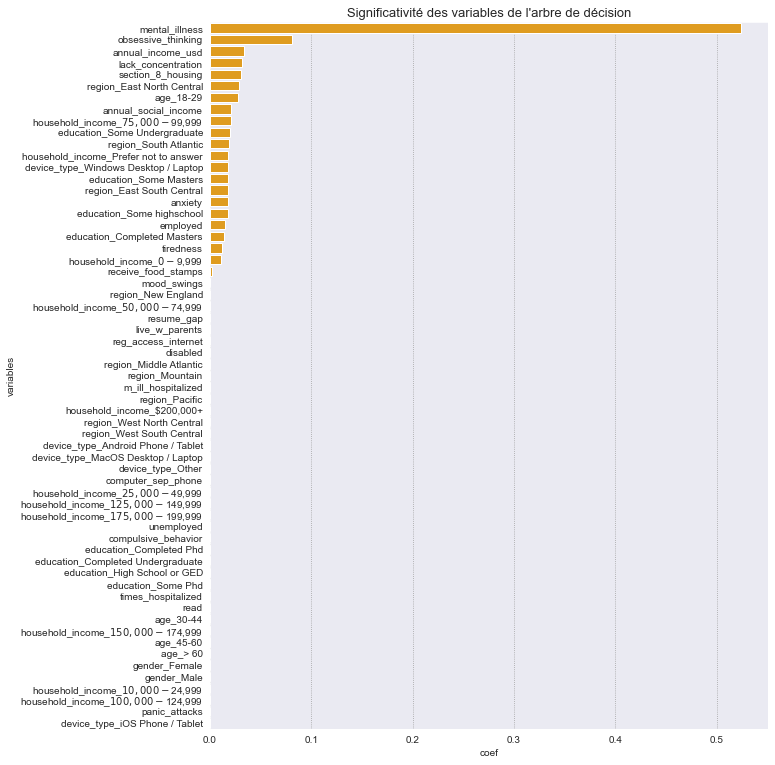

In [59]:
plt.figure(figsize=(10,13));
ax = sns.barplot(x = "coef", y = "variables", data = coef_tree, color = 'orange');
plt.title("Significativité des variables de l'arbre de décision",fontsize = 13);
# ax.set(ylabel = '');

Si l'on considère qu'une variable n'est significative que si son coefficient est superieur à 0.1, nous obtenons.

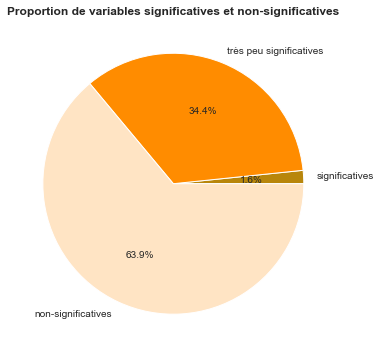

In [60]:
percent_zero = [100*coef_tree.loc[coef_tree['coef'] > 0.1].shape[0]/coef_tree.shape[0],
                100*coef_tree.loc[(coef_tree['coef'] > 0) & (coef_tree['coef'] < 0.1)].shape[0]/coef_tree.shape[0],
                100*coef_tree.loc[coef_tree['coef'] == 0].shape[0]/coef_tree.shape[0]]

percent_descrip = ["significatives","très peu significatives","non-significatives"]

plt.figure(figsize=(6,6))
plt.title("Proportion de variables significatives et non-significatives", fontweight = 'bold')
colors = ["darkgoldenrod","darkorange","bisque"]
plt.pie(percent_zero, labels = percent_descrip, colors = colors, autopct='%.1f%%');
plt.show()

La majorité de nos variables est donc peu significatives voir pas significatives au modèle. <br>
La plupart de nos variables semblent <b>inutiles</b> pour le modèle.

### Performance de l'estimation

Nous allons tracer la <b>matrice de confusion</b> du modèle.

In [384]:
tree_conf = confusion_matrix(target_test, tree_predict)
tree_conf

array([[67,  7],
       [10, 16]], dtype=int64)

Les erreurs de classification pour la class 0 correspondent à 9.5% des prédictions
Les erreurs de classfication pour la class 1 correspondent à 38.5% des prédictions


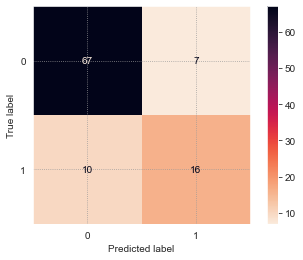

In [509]:
plot_confusion_matrix(tree_fit, data_test, target_test, cmap = sns.color_palette("rocket_r", as_cmap=True));
print(f"Les erreurs de classification pour la class 0 correspondent à {100*tree_conf[0][1]/(tree_conf[0][0]+tree_conf[0][1]):.1f}% des prédictions")
print(f"Les erreurs de classfication pour la class 1 correspondent à {100*tree_conf[1][0]/(tree_conf[1][1]+tree_conf[1][0]):.1f}% des prédictions")

Le classifieur CART se trompe ainsi <b>beaucoup plus souvent</b> pour prédire la class 1 que pour prédire la class 0. 

Nous allons maintenant nous interesser aux <b>précision, recall et f1-score</b> du modèle.

<b> Score du modèle </b>

In [451]:
print(f"Parameters of Grid Search: {grid_log.best_params_:}")

pd.DataFrame({'Precision': [precision_log, precision_score(target_test, grid_log.predict(data_test))], 
              'Recall': [recall_log, recall_score(target_test, grid_log.predict(data_test))], 
              'f1-score': [f1_log, grid_log.best_score_]},
               index = ['Logistic Regression', 'Grid Search LR']).T

Parameters of Grid Search: {'C': 1.5, 'penalty': 'l1'}


,Logistic Regression,Grid Search LR
Precision,0.678571,0.826087
Recall,0.730769,0.730769
f1-score,0.703704,0.713675


In [380]:
f1_tree = f1_score(target_test, tree_predict)
precision_tree = precision_score(target_test, tree_predict)
recall_tree = recall_score(target_test, tree_predict)

Precision score: 0.696
Recall score: 0.615
f1 score: 0.653


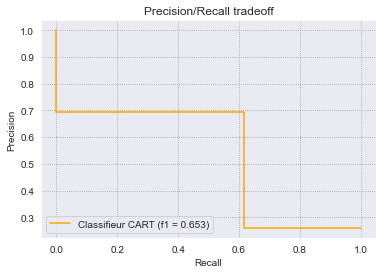

In [383]:
print(f"Precision score: {precision_tree:.3f}")
print(f"Recall score: {recall_tree:.3f}")
print(f"f1 score: {f1_tree:.3f}")

precision, recall, _ = precision_recall_curve(target_test, tree_predict);

disp = PrecisionRecallDisplay(precision=precision, recall=recall);
disp.plot(color = "orange", ax = plt.gca(), label = f'Classifieur CART (f1 = {f1_tree:.3f})');
plt.title ("Precision/Recall tradeoff");

Notre arbre de décision est donc <b>moins performant</b> que notre Grid Search Regression Logistique. <br>
Le f1-score est passé de 0.71 à 0.65 <br>
Voyons si nous pouvons améliorer la performance de notre arbre de décision par <b>Grid Search</b>.
<br>

### Sélection du meilleur modèle

In [509]:
from sklearn.model_selection import GridSearchCV

Nous allons maintenant chercher à fixer les paramètres qui joue sur <b>la taille de l'arbre</b> pour eviter le problème de <b>surapprentissage. </b> <br>
Nous allons aussi déterminer quel est le meilleur </b>critère de décision</b> (gini ou entropy) ainsi que de fixer le nombre de variables à étudier à chaque split (<b>max_features</b>).

In [453]:
dict_tree = {'criterion': ['gini','entropy'], 
             'max_depth': np.arange(1,10,1), 
             'min_samples_split': np.array([2,3,4,5]), 
             'splitter':['best','random'], 
             'max_features':['auto','sqrt','log2',None]} 

In [454]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),
                         dict_tree,cv=10, 
                         scoring = "f1").fit(data_train,target_train)

<b> Comparaison des performances du Classifieur CART et du Grid Search CART </b>

In [511]:
print(f"Paramètres of Grid Search: {grid_tree.best_params_}")

pd.DataFrame({'Precision': [precision_tree, precision_score(target_test, grid_tree.predict(data_test))], 
              'Recall': [recall_tree, recall_score(target_test, grid_tree.predict(data_test))], 
              'f1-score': [f1_tree, grid_tree.best_score_]},
               index = ['Classifieur CART', 'Grid Search CART']).T

Paramètres of Grid Search: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_split': 2, 'splitter': 'best'}


,Classifieur CART,Grid Search CART
Precision,0.695652,0.772727
Recall,0.615385,0.653846
f1-score,0.653061,0.795310


Nous remarquons que la qualité de notre estimation a nettement augmenté en choisant les paramètres donnés par le Grid Search. </br>
Le f1-score est passé de <b> 0.65</b> à presque <b>0.8 </b>.
<br>
La precision a aussi augmenté de 0.1, soit de <b> 10% </b>.

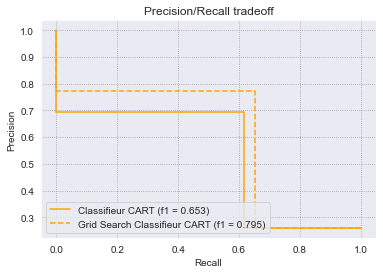

In [671]:
precision, recall, _ = precision_recall_curve(target_test, tree_predict);
precision_1, recall_1, _1 = precision_recall_curve(target_test, grid_tree.predict(data_test));

disp_tree = PrecisionRecallDisplay(precision=precision, recall=recall);
disp1_tree = PrecisionRecallDisplay(precision=precision_1, recall=recall_1);

disp_tree.plot(color = "orange", ax = plt.gca(), label = f'Classifieur CART (f1 = {f1_tree:.3f})');
disp1_tree.plot(color= "orange", ax = plt.gca(), linestyle = 'dashed', label = f'Grid Search Classifieur CART (f1 = {grid_tree.best_score_:.3f})')
plt.title ("Precision/Recall tradeoff");

<b>L'arbre de décision obtenu par GridSearch est donc plus performant que notre Régression Logistique. </b><br>
Nous allons maintenant passer à l'algorithme de <b>Random Forest</b>.
<br>

## Random Forest 

### Modèle et prédiction 

Nous allons commencer par construire un random forest en fixant class_weight à <b>"balanced"</b>, en choissisant le critère de division <b>"gini"</b> et en fixant le nombre de variables à selectionner pour un split à <b>"auto"</b> (soit la racine carrée du nombre total de variables).

<b> Construction du modèle </b>

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
forest_fit = RandomForestClassifier(criterion = "gini", 
                                    max_features = "auto", 
                                    class_weight = 'balanced').fit(data_train, target_train)

forest_predict = forest_fit.predict(data_test)

<b>Prédictions du modèle</b>

In [63]:
forest_predict

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

### Feature importance

Comme pour nos autres classifieurs, nous allons d'abord étudier <b>l'importance des variables au modèle.</b>

<b> Feature importance de notre algorithme  </b>

In [64]:
forest_fit.feature_importances_

array([0.00624422, 0.23808439, 0.00841935, 0.01987301, 0.00678622,
       0.00116175, 0.00422178, 0.01291265, 0.04739422, 0.00714732,
       0.00324279, 0.01233912, 0.00830408, 0.00230145, 0.02002827,
       0.05368779, 0.12107396, 0.04779236, 0.0244499 , 0.03173013,
       0.01197604, 0.02833929, 0.00771141, 0.00207643, 0.01034815,
       0.00413928, 0.00048559, 0.01301882, 0.00250262, 0.0030147 ,
       0.01454659, 0.01419153, 0.00828222, 0.01480634, 0.01169768,
       0.01082844, 0.00851226, 0.00589632, 0.00264868, 0.00242299,
       0.00460879, 0.        , 0.00334923, 0.00643997, 0.00786872,
       0.01501845, 0.01281844, 0.00976412, 0.00904651, 0.00663998,
       0.00728802, 0.00536665, 0.0042368 , 0.01005637, 0.00123314,
       0.00351762, 0.00894004, 0.00742352, 0.        , 0.00983342,
       0.01191008])

Contrairement à notre classifieur CART, <b>peu de variables</b> semblent avoir un <b>coefficient nul</b>. <br>
Cependant, nous remarquons qu'il semble tous <b>très proches de zéro</b>. 

In [66]:
coef_forest = pd.DataFrame({'variables':data_train.columns, 
                            'coef':forest_fit.feature_importances_}).sort_values('coef',ascending=False)

coef_forest.loc[coef_forest['coef']>0].style.applymap(lambda x: 'background-color : thistle' if x == max(coef_forest['coef']) else "")

,variables,coef
1,mental_illness,0.238084
16,anxiety,0.121074
15,lack_concentration,0.053688
17,obsessive_thinking,0.047792
8,annual_income_usd,0.047394
19,panic_attacks,0.031730
21,tiredness,0.028339
18,mood_swings,0.024450
14,times_hospitalized,0.020028
3,m_ill_hospitalized,0.019873


Nous remarquons que seule la variable <b>"mental_illness"</b> semble être importante pour le modèle, les autres variables ont toutes des coefficients <b>très proches de zéro</b>. 

Nous avions fait la même constatation pour notre <b>classifieur CART</b>. </br>
Cela n'est tout de même pas surprenant sachant que le principe du Random Forest est de <b>construire plusieurs arbres de décision</b> pour ensuite les aggréger ou effectuer un vote à la majorité.


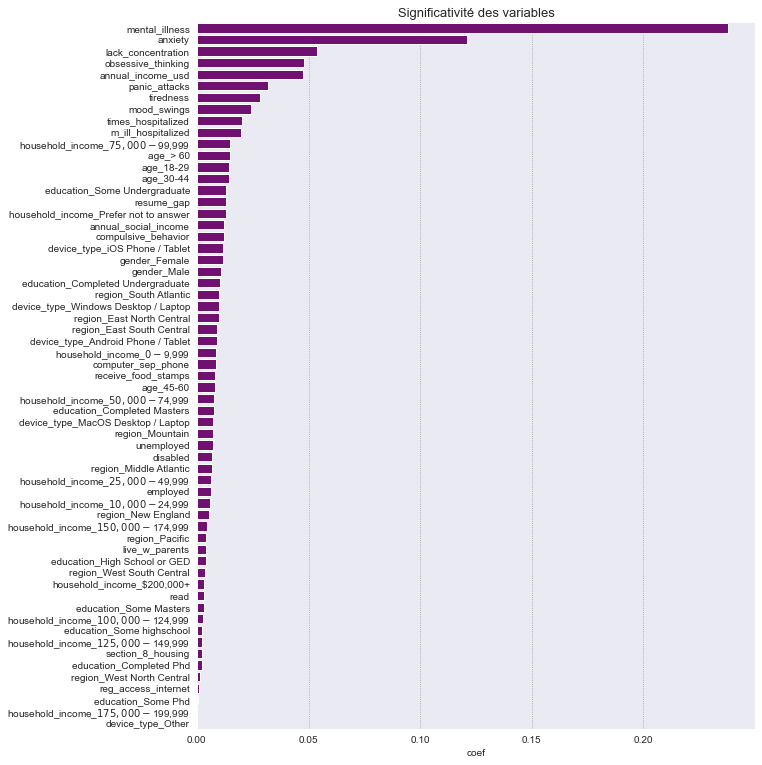

In [67]:
plt.figure(figsize=(10,13));
ax = sns.barplot(x = "coef", y = "variables", data = coef_forest, color = 'purple');
plt.title("Significativité des variables", fontsize = 13);
ax.set(ylabel = '');

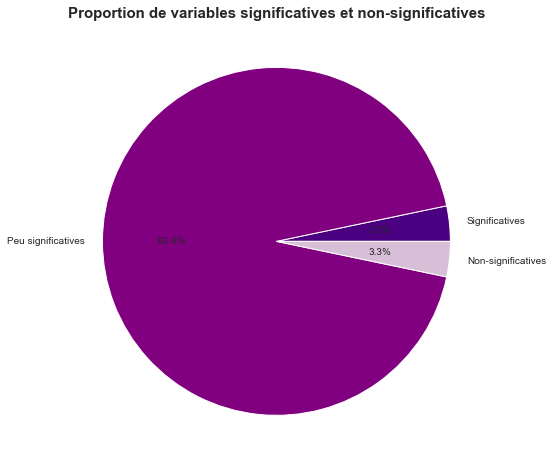

In [68]:
percent_zero = [100*coef_forest.loc[coef_forest['coef'] > 0.1].shape[0]/coef_forest.shape[0],
                100*coef_forest.loc[(coef_forest['coef'] > 0) & (coef_forest['coef'] < 0.1)].shape[0]/coef_forest.shape[0],
                100*coef_forest.loc[coef_forest['coef'] == 0].shape[0]/coef_forest.shape[0]]

percent_descrip = ["Significatives","Peu significatives","Non-significatives"]

plt.figure(figsize=(8,8))
plt.title("Proportion de variables significatives et non-significatives", fontweight = 'bold', fontsize = 15)
colors = ['indigo','purple','thistle']
plt.pie(percent_zero, labels = percent_descrip, colors = colors, autopct='%.1f%%');
plt.show()

Puisque seul "mental_illness" est vraiment significative, <b>la proportion de variables peu significatives et non_significtaives est largement majoritaire</b> (98%). <br>
Nous pouvons alors nous demander si nous n'avons pas choisi trop de variables explicatives et si il aurait fallu faire de la <b>réduire de dimension</b> avant de construire nos estimateurs.

### Performance de l'estimation 

<b> Matrice de confusion </b>

In [491]:
forest_conf = confusion_matrix(target_test, forest_predict)
forest_conf

array([[71,  3],
       [ 8, 18]], dtype=int64)

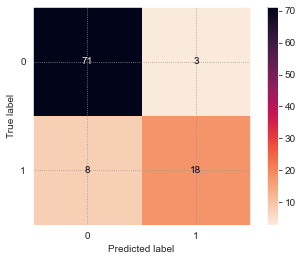

In [492]:
plot_confusion_matrix(forest_fit, data_test, target_test, cmap = sns.color_palette("rocket_r", as_cmap=True));

In [493]:
print(f"Les erreurs de classification pour la class 0 correspondent à {100*forest_conf[0][1]/(forest_conf[0][0]+forest_conf[0][1]):.1f}% des prédictions")
print(f"Les erreurs de classfication pour la class 1 correspondent à {100*forest_conf[1][0]/(tree_conf[1][1]+forest_conf[1][0]):.1f}% des prédictions")

Les erreurs de classification pour la class 0 correspondent à 4.1% des prédictions
Les erreurs de classfication pour la class 1 correspondent à 33.3% des prédictions


<b> Le Random Forest se trompe ainsi beaucoup plus souvent pour prédire la class 1 que la class 0. </b>

In [494]:
f1_forest = f1_score(target_test, forest_predict)
precision_forest = precision_score(target_test, forest_predict)
recall_forest = recall_score(target_test, forest_predict)

Precision score: 0.857
Recall score: 0.692
f1 score: 0.766


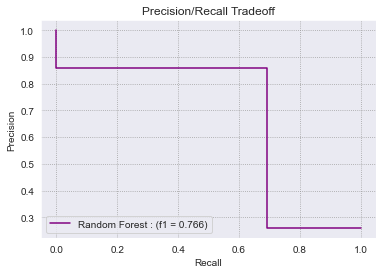

In [504]:
print(f"Precision score: {precision_forest:.3f}")
print(f"Recall score: {recall_forest:.3f}")
print(f"f1 score: {f1_forest:.3f}")

precision, recall, _ = precision_recall_curve(target_test, forest_predict);
disp = PrecisionRecallDisplay(precision=precision, recall=recall);
disp.plot(color = "purple", label = f'Random Forest : (f1 = {f1_forest:.3f})');
plt.title("Precision/Recall Tradeoff");

<b>La performance du Random Forest est donc meilleur que notre premier arbre de classification mais reste inferieur à la performance du classifieur CART obtenu par Grid Search. </b> <br>
Essayons maintenant d'optimiser la performance du Random Forest par <b> Grid Search </b>

### Selection du meilleur modèle

<b> Grid Search Random Forest </b>

In [501]:
from sklearn.model_selection import GridSearchCV

In [502]:
dict_forest = {'max_depth':[4,5,6,7,8], 
               'max_features': ['auto', 'sqrt', 'log2'],
              'criterion':['gini','entropy'],
              'class_weight':["balanced","balanced_subsample"]}

In [506]:
grid_forest = GridSearchCV(RandomForestClassifier(n_estimators = 150), 
                           dict_forest, 
                           cv=4, 
                           scoring = 'f1').fit(data_train,target_train)

<b> Comparaison des performances du Random Forest et du Random Forest Grid Search </b>

In [510]:
print(f"Parameters of Grid Search: {grid_forest.best_params_:}")

pd.DataFrame({'Precision': [precision_log, precision_score(target_test, grid_forest.predict(data_test))], 
              'Recall': [recall_log, recall_score(target_test, grid_forest.predict(data_test))], 
              'f1-score': [f1_log, grid_forest.best_score_]},
               index = ['Random Forest', 'Random Forest Grid Search']).T

Parameters of Grid Search: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt'}


,Random Forest,Random Forest Grid Search
Precision,0.678571,0.851852
Recall,0.730769,0.884615
f1-score,0.703704,0.781206


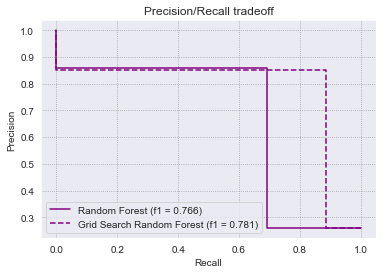

In [613]:
precision, recall, _ = precision_recall_curve(target_test, forest_predict);
precision_1, recall_1, _1 = precision_recall_curve(target_test, grid_forest.predict(data_test));

disp_forest = PrecisionRecallDisplay(precision=precision, recall=recall);
disp1_forest = PrecisionRecallDisplay(precision=precision_1, recall=recall_1);

disp_forest.plot(color = "purple", ax = plt.gca(), label = f'Random Forest (f1 = {f1_forest:.3f})');
disp1_forest.plot(color= "purple", ax = plt.gca(), linestyle = 'dashed', label = f'Grid Search Random Forest (f1 = {grid_forest.best_score_:.3f})')
plt.title ("Precision/Recall tradeoff");

La performance du Grid Search Random Forest est donc légèrement meilleure que celle du Random Forest. <br>
Cependant, pour l'instant, <b>le classifieur CART par GridSearch reste le meilleur modèle en terme de f1-score.</b>

## Support Vector Machine

### Modèle et prédiction

Nous allons commencer par fixer le noyau de notre svm à <b>"linear"</b> et à imposer class_weight à <b>"balanced"</b>.

In [69]:
from sklearn.svm import SVC 

<b> Construction du modèle </b>

In [70]:
svm_fit = SVC(kernel = 'linear', class_weight = 'balanced').fit(data_train,target_train)

<b>Predictions du modèle</b>

In [71]:
svm_predict = svm_fit.predict(data_test)
svm_predict

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

### Feature Importance

In [72]:
svm_fit.coef_

array([[ 1.93435096e-01,  2.16906837e+00, -5.51338207e-02,
         2.99138578e-01,  7.15467448e-01,  6.59534485e-01,
         5.79831952e-02,  1.51911847e-01,  3.13942978e-01,
         2.87392880e-01,  4.11990989e-01,  6.25561401e-03,
         8.11104918e-01, -1.27497645e+00,  1.10035405e-02,
         8.58480170e-01,  4.74388202e-01,  1.20646214e+00,
         6.32341754e-01,  1.67528347e-02, -8.70101012e-01,
         3.79462028e-01,  2.93833637e-01,  9.63422607e-02,
         2.03117066e-01,  7.12325321e-02,  0.00000000e+00,
         6.06083513e-01, -1.76369638e-01, -1.09423937e+00,
        -1.92897314e-02,  2.72168354e-01, -8.93430777e-02,
        -1.63535545e-01,  1.65981563e-01, -1.65981563e-01,
         2.39608076e-01, -7.08090487e-01, -5.59720768e-02,
        -4.82179308e-02, -2.86504583e-01,  0.00000000e+00,
         1.91959249e-01,  4.57924274e-03,  4.87662361e-01,
         3.52047223e-01, -1.77071075e-01,  3.25495805e-01,
         1.63168160e-01, -2.74721648e-01,  4.94048012e-0

Contrairement à notre Random Forest et notre arbre CART, les coefficients <b>ne sont pas tous proches de zéro. </b>
<br>

<b>Regardons les coefficients positifs superieurs à 0.2</b>

In [73]:
coef_svm = pd.DataFrame({'variables': data_train.columns,
              "coef":svm_fit.coef_[0]}).sort_values('coef', ascending = False)

coef_svm.loc[coef_svm['coef'] > 0.2].style.applymap(lambda x: 'background:pink' if x == max(coef_svm['coef']) else "")

,variables,coef
1,mental_illness,2.169068
17,obsessive_thinking,1.206462
15,lack_concentration,0.858480
12,receive_food_stamps,0.811105
4,disabled,0.715467
5,reg_access_internet,0.659534
18,mood_swings,0.632342
27,education_Some Undergraduate,0.606084
50,region_Mountain,0.494048
44,"household_income_$50,000-$74,999",0.487662


Comme pour tous les autres modèles, la variable <b>mental_illness</b> semble être la plus importante pour la SVM. <br>

In [75]:
print(f"La moyenne pour ces variables est de {np.mean(coef_svm['coef'].loc[coef_svm['coef'] > 0.2].values):.2f}")

La moyenne pour ces variables est de 0.55


Nous allons maintenant représenter <b>la significativité de toutes les variables. </b>

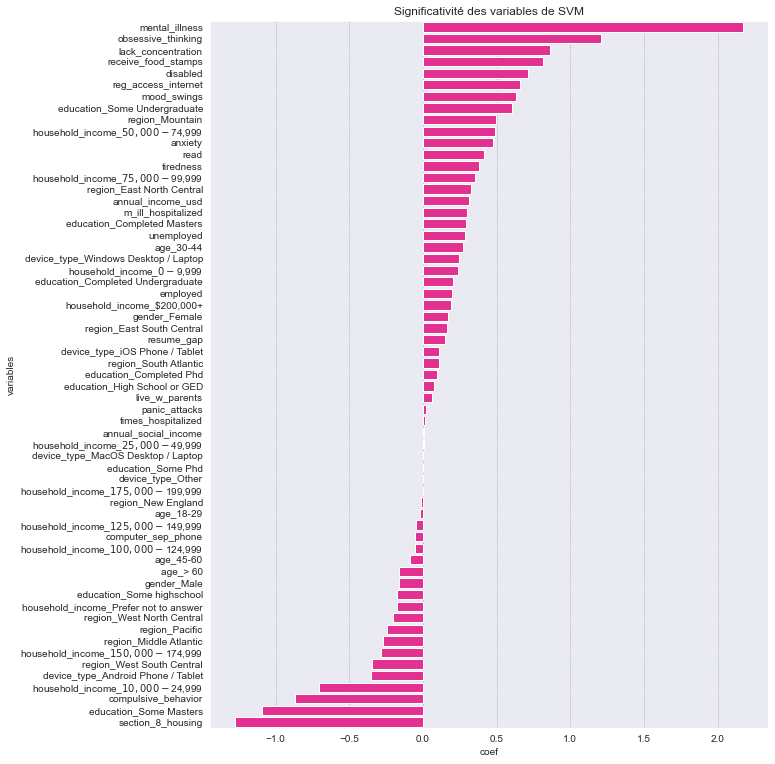

In [76]:
plt.figure(figsize=(10,13));
plt.title("Significativité des variables de SVM");
sns.barplot(data = coef_svm.sort_values('coef', ascending = False), 
            y = 'variables', 
            x = 'coef', color='deeppink');

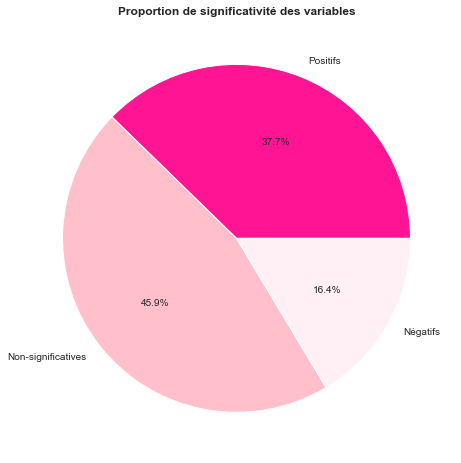

In [77]:
percent_zero = [100*coef_svm.loc[coef_svm['coef'] > 0.2].shape[0]/coef_svm.shape[0],
                100*coef_svm.loc[(coef_svm['coef'] < 0.2) & (coef_svm['coef'] > -0.2)].shape[0]/coef_svm.shape[0],
                100*coef_svm.loc[coef_svm['coef'] < -0.2].shape[0]/coef_svm.shape[0]]

percent_descrip = ["Positifs","Non-significatives","Négatifs"]

plt.figure(figsize=(8,8))
plt.title("Proportion de significativité des variables", fontweight = 'bold')
colors = ['deeppink','pink','lavenderblush']
plt.pie(percent_zero, labels = percent_descrip, colors = colors, autopct='%.1f%%');
plt.show()

<b>La proportion de variables significatives est plus importante que pour le random forest et l'arbre CART </b>

### Performance de l'estimation

<b> Matrice de confusion </b>

In [550]:
svm_conf = confusion_matrix(target_test, forest_predict)
svm_conf

array([[71,  3],
       [ 8, 18]], dtype=int64)

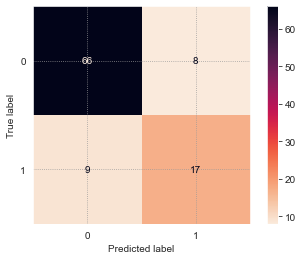

In [551]:
plot_confusion_matrix(svm_fit, data_test, target_test, cmap = sns.color_palette("rocket_r", as_cmap=True));

In [552]:
print(f"Les erreurs de classification pour la class 0 correspondent à {100*svm_conf[0][1]/(svm_conf[0][0]+svm_conf[0][1]):.1f}% des prédictions")
print(f"Les erreurs de classfication pour la class 1 correspondent à {100*svm_conf[1][0]/(svm_conf[1][1]+svm_conf[1][0]):.1f}% des prédictions")

Les erreurs de classification pour la class 0 correspondent à 4.1% des prédictions
Les erreurs de classfication pour la class 1 correspondent à 30.8% des prédictions


<b> Le classifieur SVM se trompe beaucoup plus souvent pour prédire la class 1 que la class 0 </b>

<b> Score du modèle </b>

In [554]:
f1_svm = f1_score(target_test, svm_predict)
precision_svm = precision_score(target_test, svm_predict)
recall_svm = recall_score(target_test, svm_predict)

Precision score: 0.680
Recall score: 0.654
f1 score: 0.667


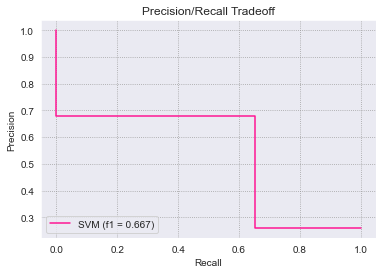

In [559]:
print(f"Precision score: {precision_svm:.3f}")
print(f"Recall score: {recall_svm:.3f}")
print(f"f1 score: {f1_svm:.3f}")

precision, recall, _ = precision_recall_curve(target_test, svm_predict);
disp = PrecisionRecallDisplay(precision=precision, recall=recall);
disp.plot(color = "deeppink", label = f'SVM (f1 = {f1_svm:.3f})');
plt.title("Precision/Recall Tradeoff");

### Selection du meilleur modèle

<b> Grid Search SVM </b>

In [566]:
dict_SVM = dict({'C':[1,2,3,4], 
                'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
                'gamma':['scale','auto'], 
                'degree':[2,3,4]})

In [567]:
grid_SVM = GridSearchCV(SVC(class_weight = 'balanced'),
                         dict_SVM,cv=5, 
                         scoring = 'f1').fit(data_train,target_train)

<b> Comparaison des performances du SVM et du Grid Search SVM </b>

In [568]:
print(f"Paramètres of Grid Search: {grid_SVM.best_params_}")

pd.DataFrame({'Precision': [precision_tree, precision_score(target_test, grid_SVM.predict(data_test))], 
              'Recall': [recall_tree, recall_score(target_test, grid_SVM.predict(data_test))], 
              'f1-score': [f1_tree, grid_SVM.best_score_]},
               index = ['SVM', 'Grid Search SVM']).T

Paramètres of Grid Search: {'C': 1, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


,SVM,Grid Search SVM
Precision,0.695652,0.785714
Recall,0.615385,0.846154
f1-score,0.653061,0.764835


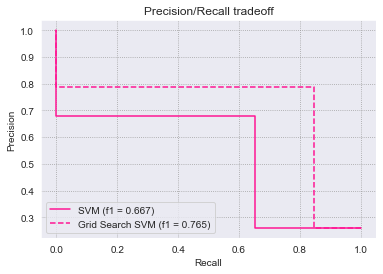

In [614]:
precision, recall, _ = precision_recall_curve(target_test, svm_predict);
precision_1, recall_1, _1 = precision_recall_curve(target_test, grid_SVM.predict(data_test));

disp_svm = PrecisionRecallDisplay(precision=precision, recall=recall);
disp1_svm = PrecisionRecallDisplay(precision=precision_1, recall=recall_1);

disp_svm.plot(color = "deeppink", ax = plt.gca(), label = f'SVM (f1 = {f1_svm:.3f})');
disp1_svm.plot(color= "deeppink", ax = plt.gca(), linestyle = 'dashed', label = f'Grid Search SVM (f1 = {grid_SVM.best_score_:.3f})')
plt.title ("Precision/Recall tradeoff");

## K-Nearest-Neighbors 

### Modèle et prédiction

In [431]:
from sklearn.neighbors import KNeighborsClassifier

In [626]:
knn_fit = KNeighborsClassifier(weights = 'distance').fit(data_train,target_train)
knn_predict = knn_fit.predict(data_test)

In [433]:
knn_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

### Performance de l'estimation

In [434]:
f1_knn = f1_score(target_test, knn_predict)
precision_knn = precision_score(target_test, knn_predict)
recall_knn = recall_score(target_test, knn_predict)

K-Nearest-Neighbor performance :
Precision score: 1.000
Recall score: 0.423
f1 score: 0.595


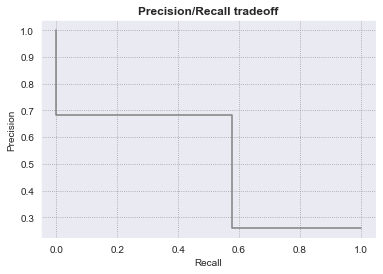

In [648]:
print('K-Nearest-Neighbor performance :')
print(f"Precision score: {precision_knn:.3f}")
print(f"Recall score: {recall_knn:.3f}")
print(f"f1 score: {f1_knn:.3f}")

precision, recall, _ = precision_recall_curve(target_test, boost_predict);
disp_boost = PrecisionRecallDisplay(precision=precision, recall=recall);
disp_boost.plot(color = "grey");
plt.title ("Precision/Recall tradeoff",fontweight = 'bold');

### Selection du meilleur modèle

In [436]:
from sklearn.model_selection import StratifiedKFold

In [437]:
dict_knn = {'n_neighbors':np.array([3,4,5,6,7,8]),
            'weights':['uniform','distance'], 
            'metric':['euclidean','manhattan','chebyshev','minkowski']}

In [438]:
grid_knn = GridSearchCV(KNeighborsClassifier(), 
                        dict_knn,
                        cv= 5,
                        scoring = 'f1').fit(data_train,target_train)

In [439]:
print(f"Parameters: {grid_knn.best_params_:}")
print(f"Score: {grid_knn.best_score_:.3f}")

Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Score: 0.602


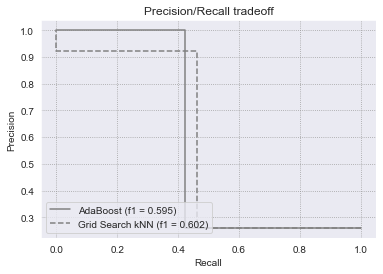

In [663]:
precision, recall, _ = precision_recall_curve(target_test, knn_predict);
precision_1, recall_1, _1 = precision_recall_curve(target_test, grid_knn.predict(data_test));

disp_knn = PrecisionRecallDisplay(precision=precision, recall=recall);
disp1_knn = PrecisionRecallDisplay(precision=precision_1, recall=recall_1);

disp_knn.plot(color = "grey", ax = plt.gca(), label = f'AdaBoost (f1 = {f1_knn:.3f})');
disp1_knn.plot(color= "grey", ax = plt.gca(), linestyle = 'dashed', label = f'Grid Search kNN (f1 = {grid_knn.best_score_:.3f})')
plt.title ("Precision/Recall tradeoff");

<br>

## AdaBoost (Boosting)

### Modèle et prédiction

<b> Construction du modèle </b>

In [85]:
from sklearn.ensemble import AdaBoostClassifier 

In [86]:
boost_fit = AdaBoostClassifier(n_estimators=100, random_state=0).fit(data_train, target_train)

<b> Prédiction du modèle </b>

In [87]:
boost_predict = boost_fit.predict(data_test)
boost_predict

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

### Feature Importance

In [89]:
coef_boost = pd.DataFrame({'variables':data_train.columns, 
                            'coef':boost_fit.feature_importances_}).sort_values('coef',ascending=False)

coef_boost.head(10).style.applymap(lambda x: 'background:lightcyan' if x == max(coef_boost['coef']) else "")

,variables,coef
8,annual_income_usd,0.190000
11,annual_social_income,0.070000
1,mental_illness,0.060000
17,obsessive_thinking,0.060000
36,"household_income_$0-$9,999",0.040000
56,device_type_Android Phone / Tablet,0.040000
12,receive_food_stamps,0.040000
32,age_45-60,0.030000
18,mood_swings,0.030000
16,anxiety,0.030000


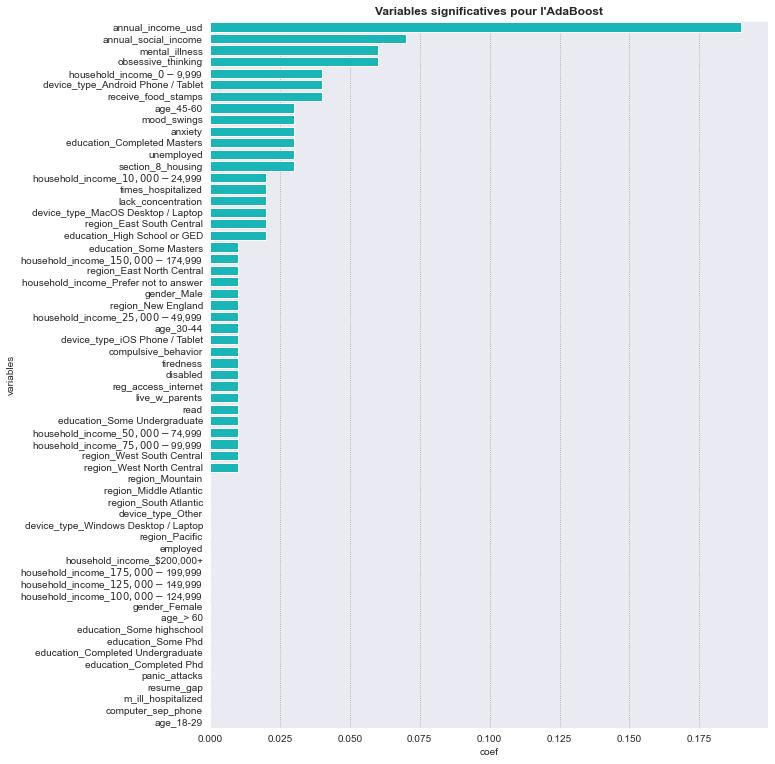

In [90]:
plt.figure(figsize=(10,13));
plt.title("Variables significatives pour l'AdaBoost", fontweight = 'bold');
sns.barplot(data = coef_boost, x =  'coef',
            y = 'variables', color="darkturquoise");

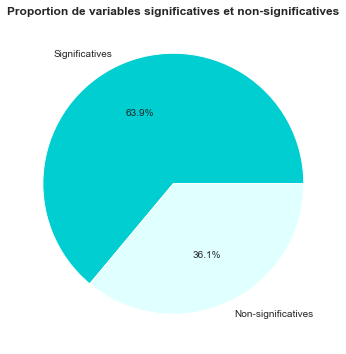

In [94]:
percent_zero = [100*coef_boost.loc[coef_boost['coef'] > 0].shape[0]/coef_boost.shape[0],
                100*coef_boost.loc[coef_boost['coef'] == 0].shape[0]/coef_boost.shape[0]]

percent_descrip = ["Significatives","Non-significatives"]

plt.figure(figsize=(6,6))
plt.title("Proportion de variables significatives et non-significatives", fontweight = 'bold')
colors = ['darkturquoise','lightcyan']
plt.pie(percent_zero, labels = percent_descrip, colors = colors, autopct='%.1f%%');
plt.show()

### Performance de l'estimation

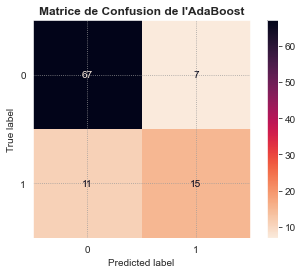

In [600]:
plot_confusion_matrix(boost_fit, data_test, target_test, cmap = sns.color_palette("rocket_r", as_cmap=True));
plt.title("Matrice de Confusion de l'AdaBoost", fontweight = 'bold')
plt.show()

In [601]:
f1_boost = f1_score(target_test, boost_predict)
precision_boost = precision_score(target_test, boost_predict)
recall_boost = recall_score(target_test, boost_predict)

Precision score: 0.682
Recall score: 0.577
f1 score: 0.625


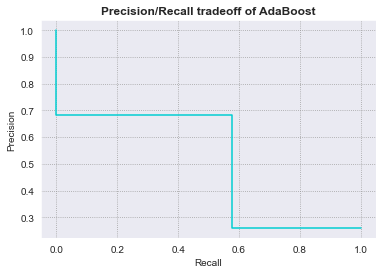

In [641]:
print(f"Precision score: {precision_boost:.3f}")
print(f"Recall score: {recall_boost:.3f}")
print(f"f1 score: {f1_boost:.3f}")

precision, recall, _ = precision_recall_curve(target_test, boost_predict);
disp_boost = PrecisionRecallDisplay(precision=precision, recall=recall);
disp_boost.plot(color = "darkturquoise");
plt.title ("Precision/Recall tradeoff of AdaBoost",fontweight = 'bold');

### Sélection du meilleur modèle

In [639]:
dict_boost = {'n_estimators':[500,1000,2000],
              'learning_rate':[.001,0.01,.1]} 

In [624]:
grid_boost = GridSearchCV(AdaBoostClassifier(base_estimator=None), 
                        dict_boost,
                        cv= 5,
                        scoring = 'f1').fit(data_train,target_train)

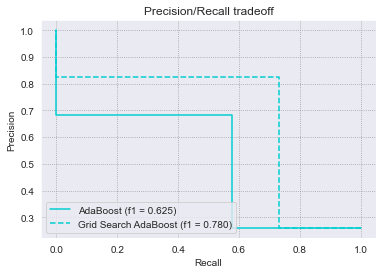

In [640]:
precision, recall, _ = precision_recall_curve(target_test, boost_predict);
precision_1, recall_1, _1 = precision_recall_curve(target_test, grid_boost.predict(data_test));

disp_boost = PrecisionRecallDisplay(precision=precision, recall=recall);
disp1_boost = PrecisionRecallDisplay(precision=precision_1, recall=recall_1);

disp_boost.plot(color = "darkturquoise", ax = plt.gca(), label = f'AdaBoost (f1 = {f1_boost:.3f})');
disp1_boost.plot(color= "darkturquoise", ax = plt.gca(), linestyle = 'dashed', label = f'Grid Search AdaBoost (f1 = {grid_boost.best_score_:.3f})')
plt.title ("Precision/Recall tradeoff");

## Comparaison des modèles et conclusion

L'objectif de notre projet est de trouver parmi les 6 modèles étudiés <b> le meilleur modèle pour prédire si un individu est déprimée ou non. </b>
Un <b>"bon modèle"</b> est un modèle qui prédit correctement les deux class de la variable "depression", malgré le manque de données concernant la class 1 (les individus se déclarant "déprimés"). <br>
Le meilleur modèle est celui qui dispose du meilleur "f1-score".


Le f1-score a été choisi car il prend en compte la capacité du modèle à prédire les deux classes.

Voici un récapitulatif des scores obtenus pour les 6 modèles (construit par Grid Search), ainsi que la variable la plus influente pour chacun de ces modèles.

In [735]:
score_comp = pd.DataFrame({'Precision': [precision_score(target_test, grid_log.predict(data_test)), 
                            precision_score(target_test, grid_tree.predict(data_test)), 
                            precision_score(target_test, grid_forest.predict(data_test)),
                            precision_score(target_test, grid_SVM.predict(data_test)),
                            precision_score(target_test, grid_knn.predict(data_test)),
                            precision_score(target_test, grid_boost.predict(data_test))], 
              'Recall': [recall_score(target_test, grid_log.predict(data_test)),
                        recall_score(target_test, grid_tree.predict(data_test)),
                        recall_score(target_test, grid_forest.predict(data_test)),
                        recall_score(target_test, grid_SVM.predict(data_test)),
                        recall_score(target_test, grid_knn.predict(data_test)),
                        recall_score(target_test, grid_boost.predict(data_test))], 
              'f1-score': [grid_log.best_score_, 
                           grid_tree.best_score_,
                           grid_forest.best_score_,
                           grid_SVM.best_score_,
                           grid_knn.best_score_,
                           grid_boost.best_score_],
               'Best feature': [coef_log['variables'].iloc[0],
                                          coef_tree['variables'].iloc[0], 
                                          coef_forest['variables'].iloc[0] , 
                                          coef_svm['variables'].iloc[0],
                                          None,
                                          coef_boost['variables'].iloc[0]]},
             index = ['Logistic Regression', 'Arbre CART','Random Forest', 'SVM', 'kNN', 'AdaBoost' ]).T

score_comp

,Logistic Regression,Arbre CART,Random Forest,SVM,kNN,AdaBoost
Precision,0.826087,0.772727,0.851852,0.785714,0.923077,0.826087
Recall,0.730769,0.653846,0.884615,0.846154,0.461538,0.730769
f1-score,0.713675,0.79531,0.781206,0.764835,0.601579,0.780412
Best feature,mental_illness,mental_illness,mental_illness,mental_illness,None,annual_income_usd


Nous allons finir par representer le <b>Precision/Recall Tradeoff</b> pour chaque modèle (paramétré grâce à un Grid Search)

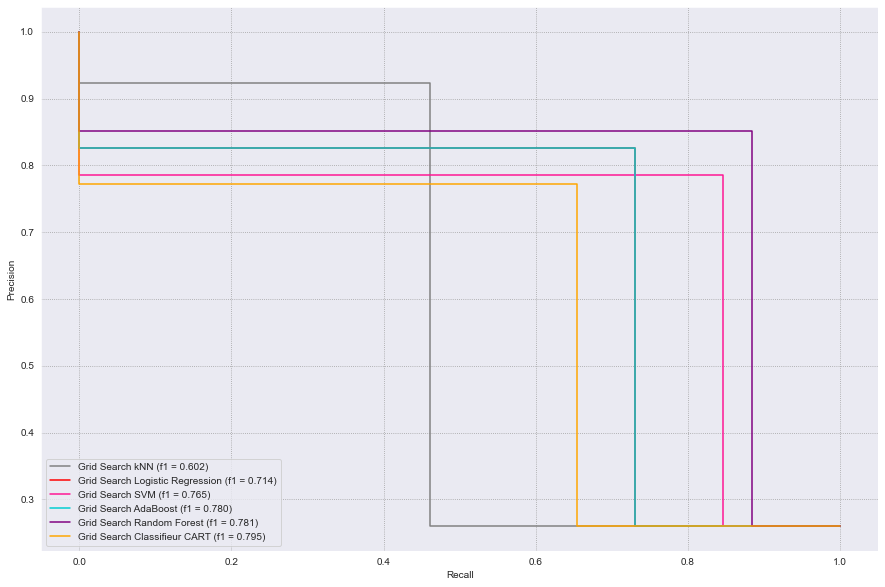

In [679]:
plt.figure(figsize=(15,10))

disp1_knn.plot(color= "grey", 
               ax = plt.gca(), 
               label = f'Grid Search kNN (f1 = {grid_knn.best_score_:.3f})');

disp1_log.plot(color= "r", 
               ax = plt.gca(), 
               label = f'Grid Search Logistic Regression (f1 = {grid_log.best_score_:.3f})');

disp1_svm.plot(color= "deeppink",
               ax = plt.gca(), 
               label = f'Grid Search SVM (f1 = {grid_SVM.best_score_:.3f})');

disp1_boost.plot(color= "darkturquoise", 
                 ax = plt.gca(), 
                 label = f'Grid Search AdaBoost (f1 = {grid_boost.best_score_:.3f})');


disp1_forest.plot(color= "purple", 
                  ax = plt.gca(),
                  label = f'Grid Search Random Forest (f1 = {grid_forest.best_score_:.3f})');

disp1_tree.plot(color= "orange",
                ax = plt.gca(), 
                label = f'Grid Search Classifieur CART (f1 = {grid_tree.best_score_:.3f})');